In [1]:
import matplotlib as mlt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import datetime
sns.set()

In [2]:
sumanth_df = pd.read_csv('./Downloads/Netflix Data/Sumanth_Netflix.csv', encoding='cp1252')
sumanth_df.head(2)

,Title,Date
0,Stranger Things: Stranger Things 3: Chapter Ei...,7/13/2019
1,Aziz Ansari: RIGHT NOW,7/12/2019


In [3]:
#Converted into datetime format

sumanth_df['Date'] = pd.to_datetime(sumanth_df['Date'])

### Extracted possible columns

In [4]:
sumanth_df['Day'] = sumanth_df['Date'].dt.day
sumanth_df['Month'] = sumanth_df['Date'].dt.month_name()
sumanth_df['Week Day'] = sumanth_df['Date'].dt.day_name()
sumanth_df['Year'] = sumanth_df['Date'].dt.year


sumanth_df.head(2)

,Title,Date,Day,Month,Week Day,Year
0,Stranger Things: Stranger Things 3: Chapter Ei...,2019-07-13,13,July,Saturday,2019
1,Aziz Ansari: RIGHT NOW,2019-07-12,12,July,Friday,2019


In [5]:
details = sumanth_df.Title.str.split(":", expand = True, n=2)

In [6]:
sumanth_df['Name'] = details[0]
sumanth_df['Season'] = details[1]
sumanth_df['Episode'] = details[2]

sumanth_df.head(2)

,Title,Date,Day,Month,Week Day,Year,Name,Season,Episode
0,Stranger Things: Stranger Things 3: Chapter Ei...,2019-07-13,13,July,Saturday,2019,Stranger Things,Stranger Things 3,Chapter Eight: The Battle of Starcourt
1,Aziz Ansari: RIGHT NOW,2019-07-12,12,July,Friday,2019,Aziz Ansari,RIGHT NOW,None


In [7]:
sumanth_df['show_type'] = sumanth_df.apply(lambda x:'Movie' if pd.isnull(x['Season']) else 'TV Show' , axis=1)

In [8]:
sumanth_df.head(2)

,Title,Date,Day,Month,Week Day,Year,Name,Season,Episode,show_type
0,Stranger Things: Stranger Things 3: Chapter Ei...,2019-07-13,13,July,Saturday,2019,Stranger Things,Stranger Things 3,Chapter Eight: The Battle of Starcourt,TV Show
1,Aziz Ansari: RIGHT NOW,2019-07-12,12,July,Friday,2019,Aziz Ansari,RIGHT NOW,None,TV Show


In [11]:
sumanth_df.to_csv('./Downloads/Netflix Data/SumanthDetails.csv', index = False)

### Viewing distribution per day of the months

C:\Users\KARTHIK\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


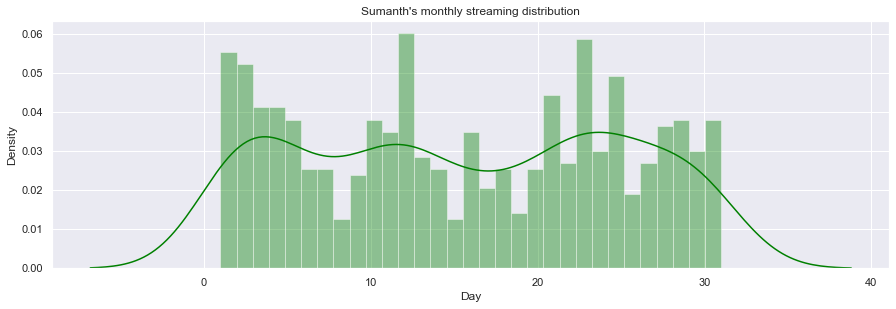

In [12]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.title("Sumanth's monthly streaming distribution")
ax = sns.distplot(sumanth_df['Day'],bins=31,color="green",hist=True)

### Distribution per week

Text(0, 0.5, 'Frequency')

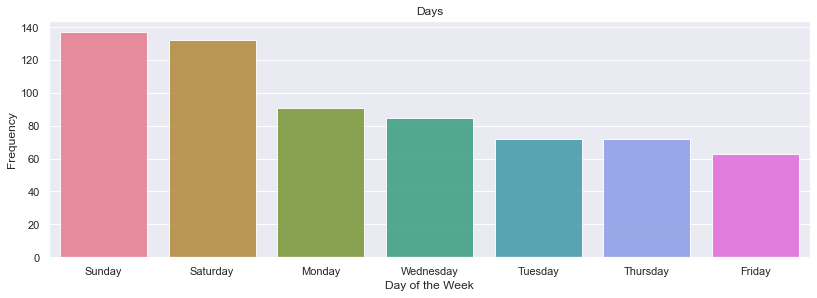

In [13]:
plt.figure(figsize=(30,20))
plt.subplot(4,2,2)
ax = sns.barplot(x=sumanth_df["Week Day"].value_counts().index, y=sumanth_df["Week Day"].value_counts(), palette="husl",alpha=0.9)
plt.title("Days")
plt.xlabel("Day of the Week")
plt.ylabel("Frequency")

### Distribution per month, year wise

Text(0.5, 1.0, 'Sumanth most spented months')

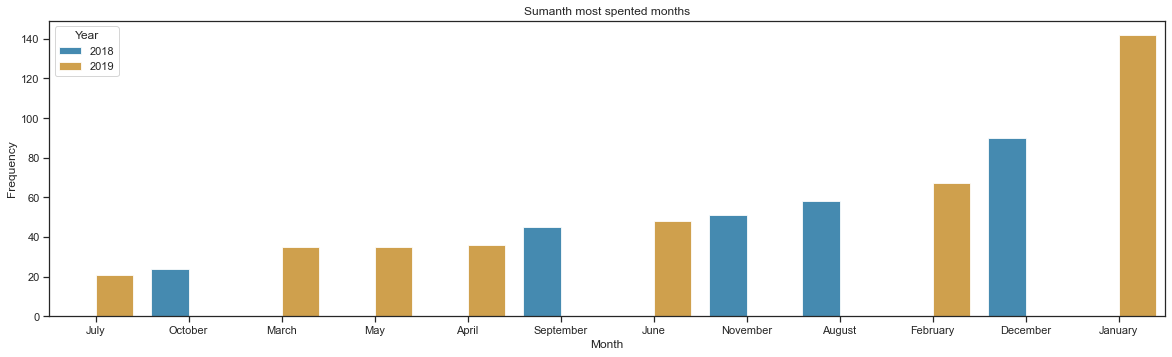

In [14]:
sns.set_style('ticks')
yearwise = sumanth_df.groupby('Month')['Year'].value_counts().sort_values(ascending=True).reset_index(name='Frequency')

plt.figure(figsize=(20,25))
plt.subplot(4,1,1)
ax = sns.barplot(x=yearwise['Month'], y=yearwise['Frequency'], hue=yearwise['Year'], palette='colorblind',alpha=0.8)
plt.title('Sumanth most spented months')

### Content preference

Text(0.5, 1.0, 'Shows vs Movies')

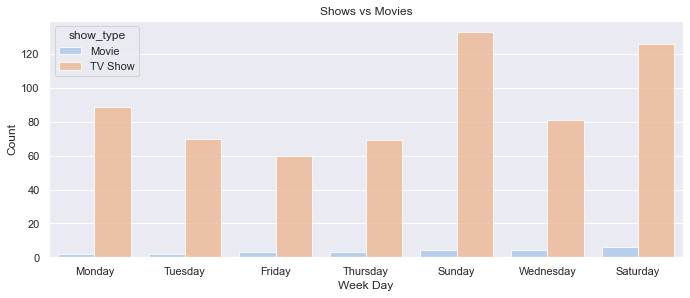

In [15]:
sns.set_style('darkgrid')

Freq = sumanth_df.groupby('show_type')['Week Day'].value_counts().sort_values(ascending=True).reset_index(name='Count')

plt.figure(figsize=(25,20))
plt.subplot(4,2,2)
ax = sns.barplot(x=Freq['Week Day'], y=Freq['Count'], hue=Freq['show_type'], palette='pastel',alpha=0.8)
plt.title('Shows vs Movies')